# Solution

## (2) Case Study: Source and investigate usable data sources 
##### (GenAI Life Cycle Phase 2: Data Understanding self-practice)

---

##### Note on EDA
When performing Exploratory Data Analysis (EDA), the specific techniques used are less important than the overall goal: gaining a solid understanding of the data before transforming or modeling it. The primary objective of EDA is to uncover insights about the structure, quality, and relationships within the dataset to inform subsequent steps effectively.

---

- Load the head of each file to view the first few entries of each dataset.

In [9]:
import pandas as pd

# Load datasets
df_business = pd.read_csv('yelp_academic_dataset_business.csv')
df_review = pd.read_csv('yelp_academic_dataset_review.csv')
df_user = pd.read_csv('yelp_academic_dataset_user.csv')

# Perform EDA
print("Business Dataset Head:")
print(df_business.info())
print("\nReview Dataset Head:")
print(df_review.info())
print("\nUser Dataset Head:")
print(df_user.info())

Business Dataset Head:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76214 entries, 0 to 76213
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   76214 non-null  object 
 1   name          76214 non-null  object 
 2   address       73808 non-null  object 
 3   city          76214 non-null  object 
 4   state         76214 non-null  object 
 5   postal_code   76183 non-null  object 
 6   latitude      76214 non-null  float64
 7   longitude     76214 non-null  float64
 8   stars         76214 non-null  float64
 9   review_count  76214 non-null  int64  
 10  is_open       76214 non-null  int64  
 11  attributes    69677 non-null  object 
 12  categories    76170 non-null  object 
 13  hours         64671 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 8.1+ MB
None

Review Dataset Head:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360015 entries, 0 to 2360014
Data column

#### 1. First file: `yelp_academic_dataset_business.csv`

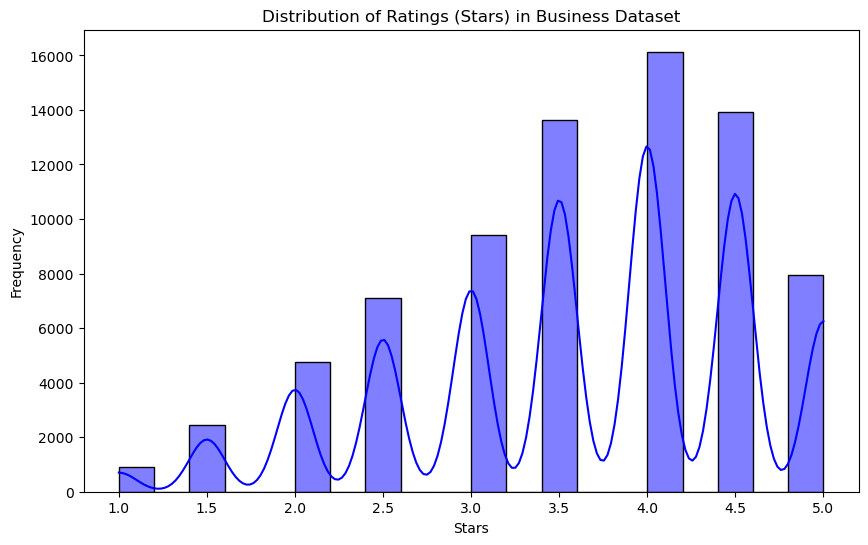

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load business dataset
df_business = pd.read_csv('yelp_academic_dataset_business.csv')

# Distribution of Ratings (Stars)
plt.figure(figsize=(10, 6))
sns.histplot(df_business['stars'], bins=20, kde=True, color='blue')
plt.title('Distribution of Ratings (Stars) in Business Dataset')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()


/var/folders/hj/877lyhb1715fltx1jm9dkwxw0000gn/T/ipykernel_45659/2859398872.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


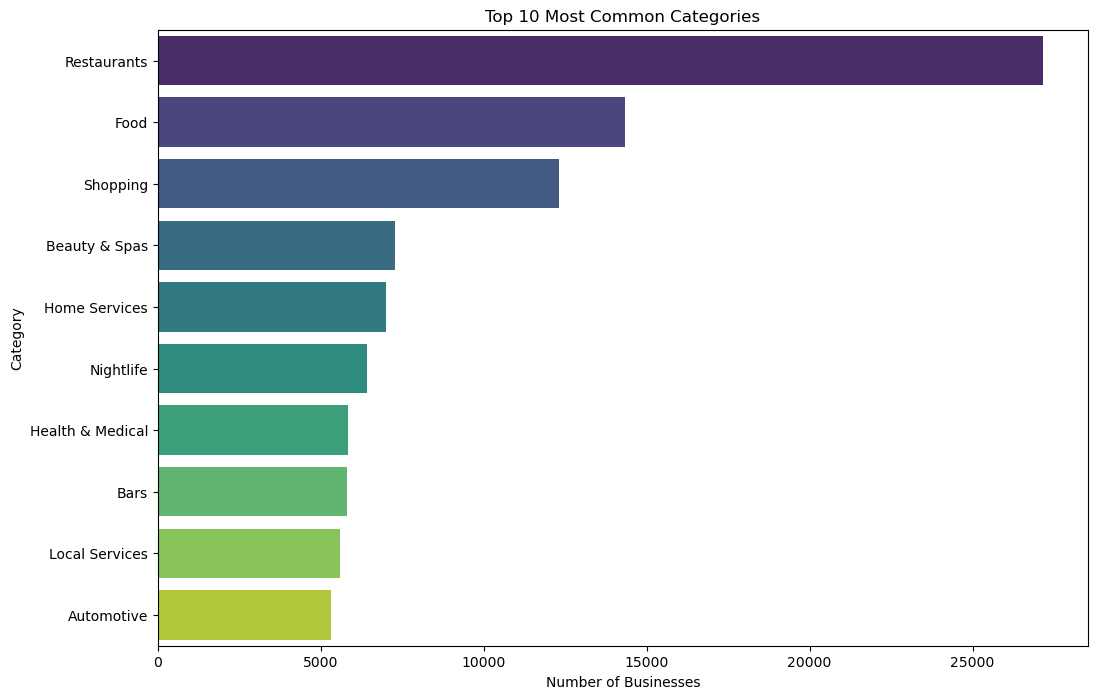

In [11]:
# Extract top categories from the categories column
df_business['categories'] = df_business['categories'].fillna('')
categories = df_business['categories'].str.split(',').explode().str.strip()

# Count the occurrences of each category
category_counts = categories.value_counts().head(10)

# Plot the top 10 categories
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Top 10 Most Common Categories')
plt.xlabel('Number of Businesses')
plt.ylabel('Category')
plt.show()


- The scope of this project encompasses restaurants and bars so let's revisit 'Distribution of Ratings (Stars) in Business Dataset' focused on those two categories

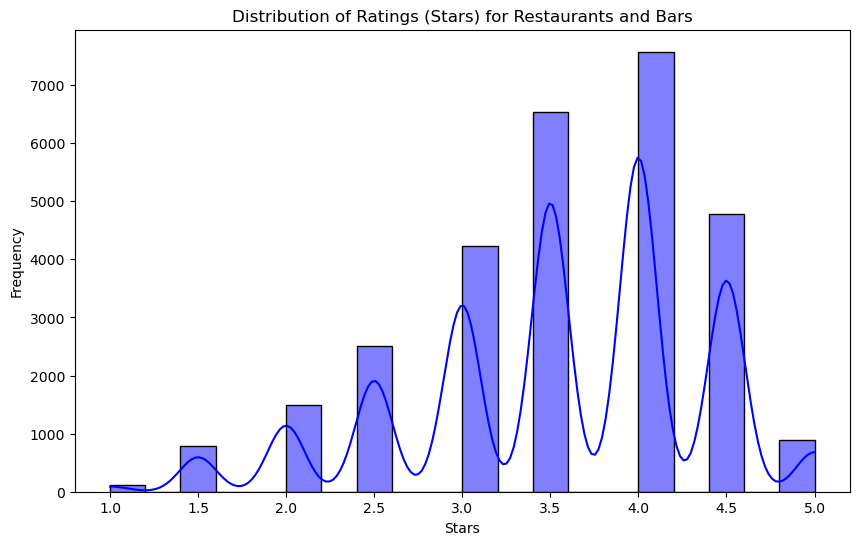

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load business dataset
df_business = pd.read_csv('yelp_academic_dataset_business.csv')

# Filter for Restaurants and Bars
df_filtered = df_business[df_business['categories'].str.contains('Restaurants|Bars', na=False)]

# Distribution of Ratings (Stars) for Restaurants and Bars
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['stars'], bins=20, kde=True, color='blue')
plt.title('Distribution of Ratings (Stars) for Restaurants and Bars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()


#### 2. Second file: `yelp_academic_dataset_review.csvv`

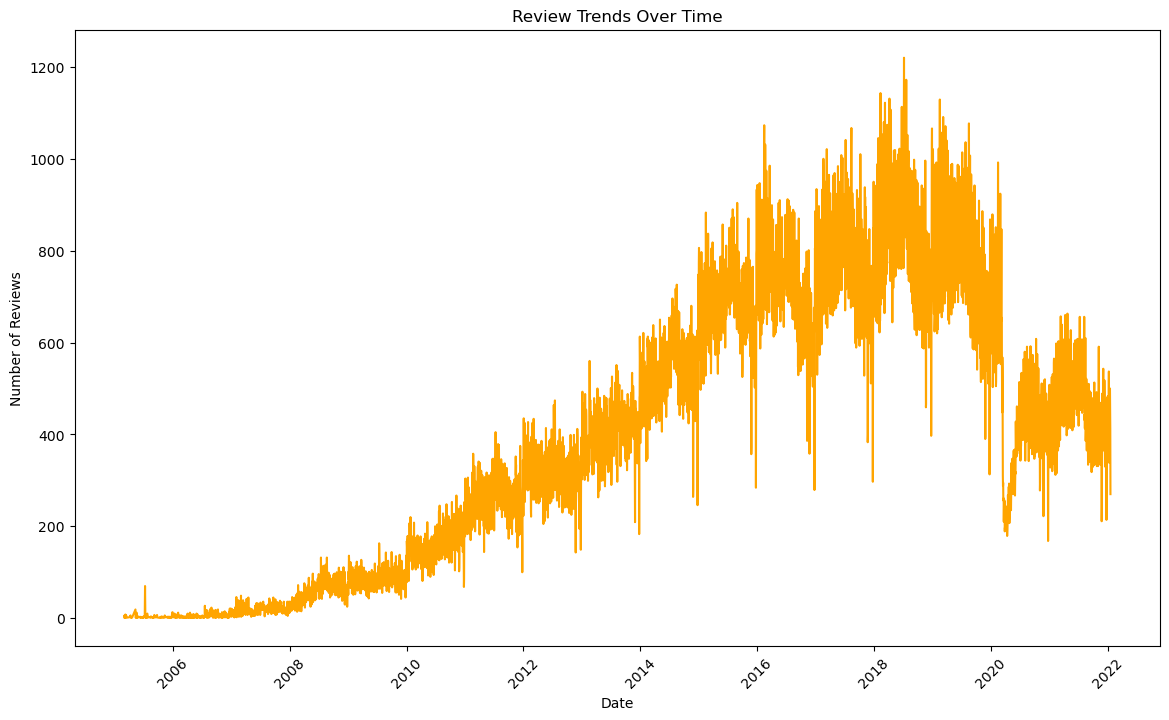

In [13]:
# Load review dataset
df_reviews = pd.read_csv('yelp_academic_dataset_review.csv')

# Convert date to datetime format
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Group by date and count reviews
reviews_by_date = df_reviews.groupby(df_reviews['date'].dt.date).size()

# Line plot of reviews over time
plt.figure(figsize=(14, 8))
reviews_by_date.plot(kind='line', color='orange')
plt.title('Review Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


- We can look at the sentiment scores of the reviews

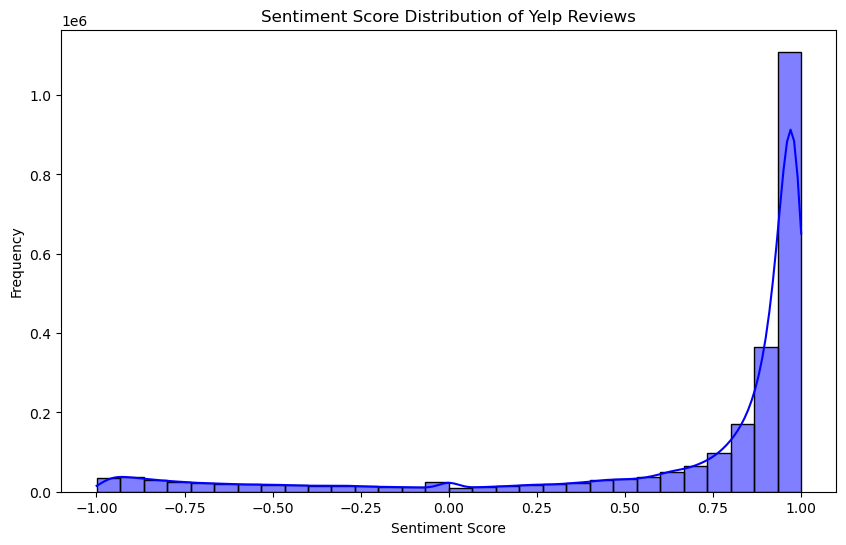

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER Lexicon
nltk.download('vader_lexicon', quiet=True)

# Initialize Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# Load Reviews Dataset
df_reviews = pd.read_csv('yelp_academic_dataset_review.csv')

# Sentiment Analysis on Review Text
df_reviews['sentiment_score'] = df_reviews['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Plot Sentiment Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews['sentiment_score'], bins=30, kde=True, color='blue')
plt.title("Sentiment Score Distribution of Yelp Reviews")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


#### 3. Third file: `yelp_academic_dataset_review.csvv`

We hadn't dealt with users in the Practice Learning Activity of Chapter 2. One useful way to get an overview of users is to segment into groups them by their different information.

/opt/anaconda3/envs/ailtk/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


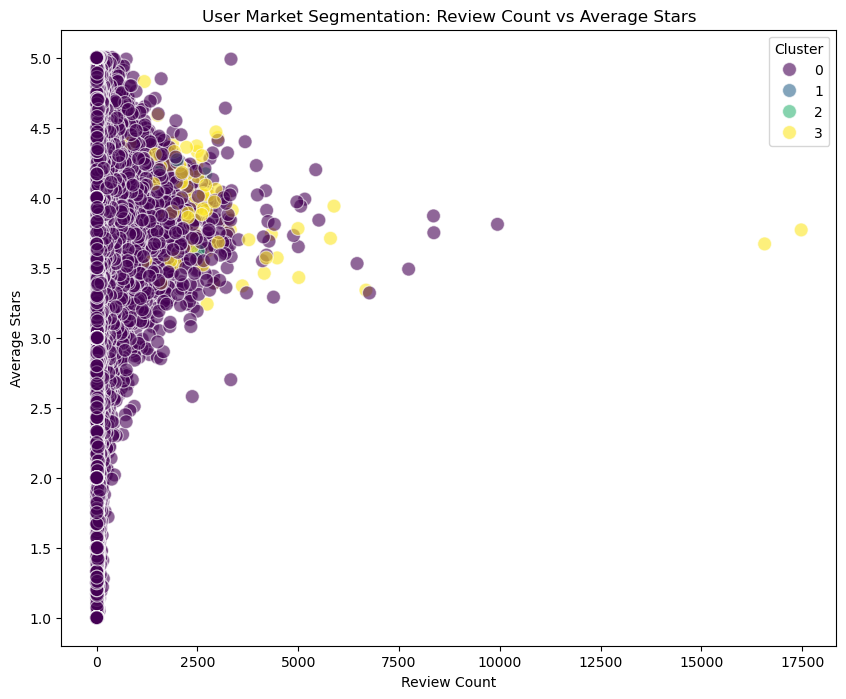

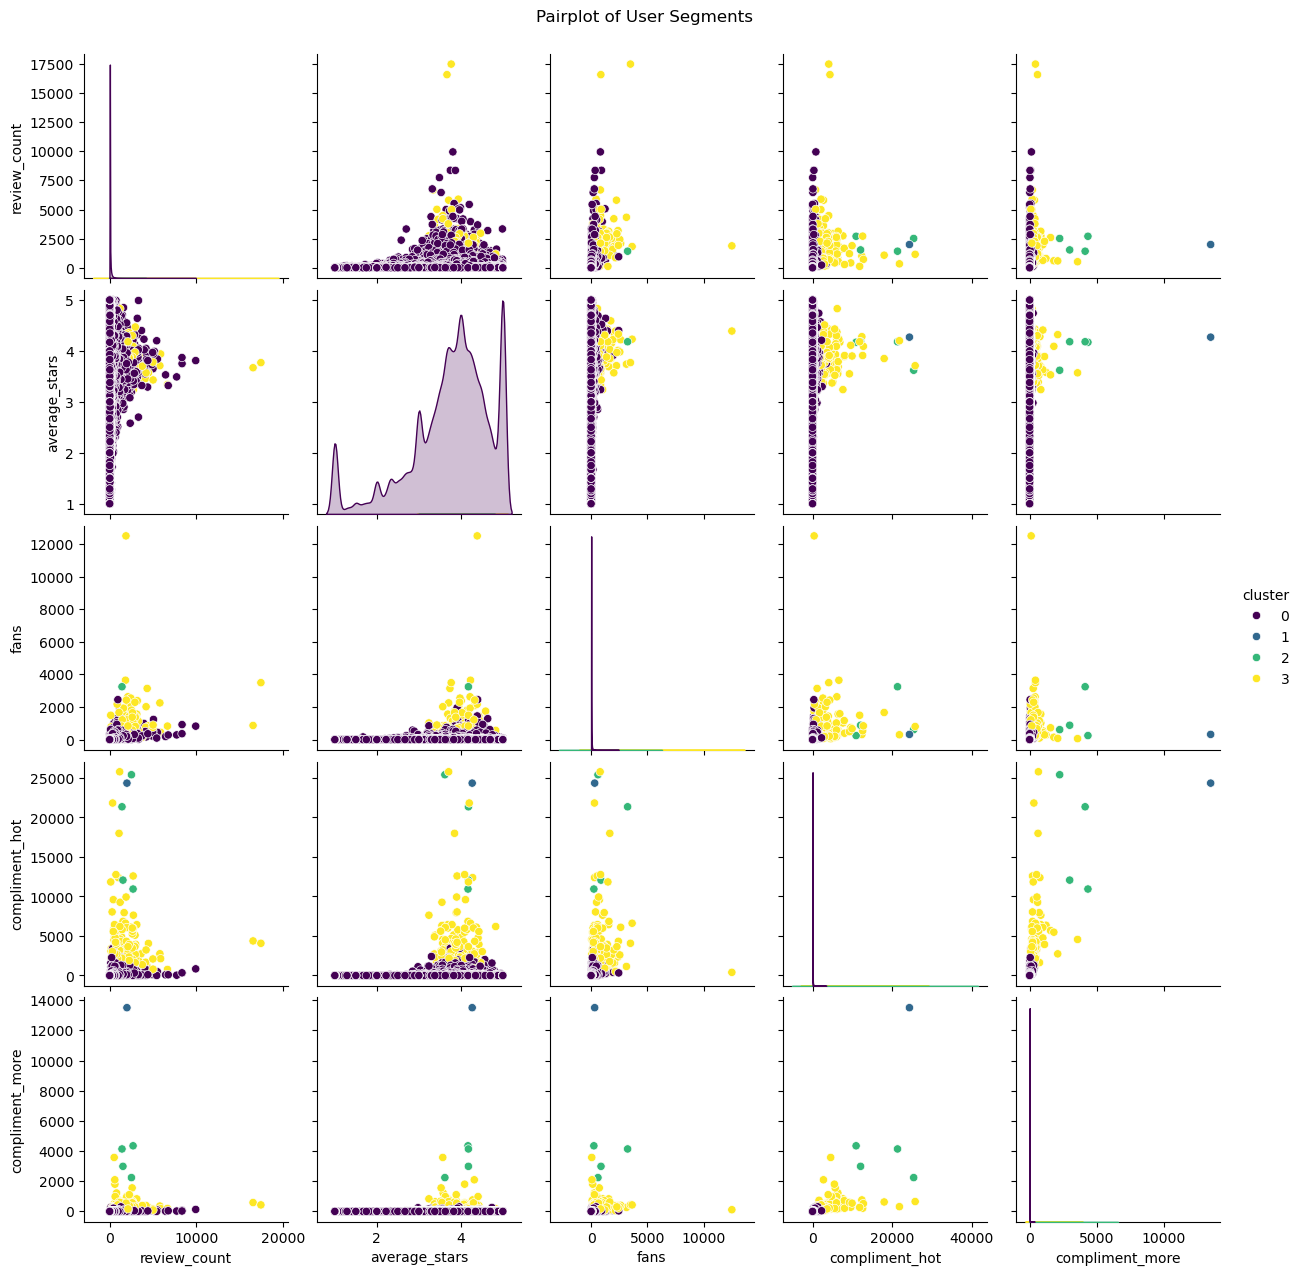

Cluster Centers (User Segments):
   review_count  average_stars       fans  compliment_hot  compliment_more  \
0     -0.005121      -0.000088  -0.009681       -0.012950        -0.007478   
1     14.160863       0.557050   9.539340      204.724998       563.805120   
2     14.513021       0.313668  37.532019      146.674197       143.122070   
3     13.077898       0.222626  24.600368       29.851632        13.642348   

   compliment_profile  compliment_cute  compliment_list  compliment_note  \
0           -0.006956        -0.005612        -0.004320        -0.008613   
1          498.999517       627.388900       644.257478       157.884846   
2          183.296452        96.354081        95.507036        79.785281   
3           11.764079         9.391955         5.925746        20.116056   

   compliment_plain  compliment_cool  compliment_funny  compliment_writer  \
0         -0.011420        -0.013469         -0.013469          -0.011905   
1        115.505556       187.139740     

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load user dataset
df_users = pd.read_csv('yelp_academic_dataset_user.csv')

# Feature selection: Choose relevant features for market segmentation
features = ['review_count', 'average_stars', 'fans', 
            'compliment_hot', 'compliment_more', 'compliment_profile',
            'compliment_cute', 'compliment_list', 'compliment_note',
            'compliment_plain', 'compliment_cool', 'compliment_funny',
            'compliment_writer', 'compliment_photos']

# Fill missing values (if any)
df_users[features] = df_users[features].fillna(0)

# Normalize/Scale the data
scaler = StandardScaler()
df_users_scaled = scaler.fit_transform(df_users[features])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Change the number of clusters based on analysis
df_users['cluster'] = kmeans.fit_predict(df_users_scaled)

# Visualize the segmentation
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_users['review_count'], y=df_users['average_stars'], hue=df_users['cluster'], palette='viridis', s=100, alpha=0.6)
plt.title('User Market Segmentation: Review Count vs Average Stars')
plt.xlabel('Review Count')
plt.ylabel('Average Stars')
plt.legend(title='Cluster')
plt.show()

# Pairplot to visualize clusters
sns.pairplot(df_users[['review_count', 'average_stars', 'fans', 'compliment_hot', 'compliment_more', 'cluster']], hue='cluster', palette='viridis')
plt.suptitle("Pairplot of User Segments", y=1.02)
plt.show()

# Display cluster centers
centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("Cluster Centers (User Segments):")
print(centers)

# Segment Analysis
for i in range(4):  # Change the number of clusters here if necessary
    print(f"\nCluster {i} Summary:")
    segment = df_users[df_users['cluster'] == i]
    print(segment[features].describe())


- You may customize the code above to try and group the users by different segments.